# 2.1 사이킷런 소개와 특징

#### 사이킷런의 특징

* 파이썬 기반의 다른 머신러닝 패키지도 사이킷런 스타일의 API를 지향할 정도로 쉽고 가장 파이썬스러운 API를 제공한다
* 머신러닝을 위한 매우 다양한 알고리즘과 개발을 위한 편리한 프레임워크와 API를 제공한다
* 오랜 기간 실전 환경에서 검증됐으며, 매우 많은 환경에서 사용되는 성숙한 라이브러리입니다.


In [1]:
import sklearn

print(sklearn.__version__) # 사이킷런 버전 확인하기

1.2.2


# 2.2 첫 번째 머신러닝 만들어 보기 - 붓꽃 품종 예측하기

### 사이킷런을 이용하여 붓꽃(Iris) 데이터 품종 예측하기

#### 사이킷런의 붓꽃 데이터 세트
- 꽃잎의 길이와 너비, 꽃받침의 길이와 너비 (Feautre)를 바탕으로
꽃의 품종을 예측하기 위한 것 **(분류)**


* 지도학습은 학습을 위한 다양한 피처와 분류 결정값인 레이블(Label) 데이터로 모델을 학습한 뒤, 별도의 테스트 데이터 세트에서 미지의 레이블을 예측한다


In [2]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# sklearn의 datasets로 붓꽃 데이터 생성
# sklearn의 tree로 의사결정트리 알고리즘 import
# sklearn의 model_selection으로 학습 데이터와 테스트 데이터를 분리


In [3]:
import pandas as pd

# 붓꽃 데이터 세트를 로딩한다
iris = load_iris()

# iris.data()로 붓꽃 데이터의 피처(Feature)만으로 구성된 numpy 데이터를 불러온다
iris_data = iris.data

# iris_label로 붓꽃 데이터의 레이블(Label)로 구성된 numpy 데이터를 불러온다
iris_label = iris.target

# 붓꽃 데이터 레이블 값과 명칭 출력
print("iris target값:", iris_label)
print("iris target명", iris.target_names)

# 붓꽃 데이터 세트를 자세히 보기 위해 DataFrame으로 변환한다
iris_df = pd.DataFrame(data = iris_data, columns = iris.feature_names)
iris_df['label'] = iris_label

# 3번째 행까지 출력
iris_df.head(3)


iris target값: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
iris target명 ['setosa' 'versicolor' 'virginica']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [4]:
# 학습용 데이터와 테스트용 데이터 분리하기
X_train, X_test, Y_train, Y_test = train_test_split(iris_data, iris_label, test_size = 0.2, random_state = 11)

# X_train은 학습용 피처 데이터 세트, X_test는 테스트용 피처 데이터 세트, Y_train은 학습용 레이블 데이터 세트, Y_test는 테스트용 레이블 데이터 세트
# 위 코드는 train_test_split(학습용 데이터, 테스트용 데이터, 테스트 크기, 수행할 때마다 동일한 데이터로 뽑기)로 구성되어 있다.



In [5]:
# DecisionTreeClassifier 의사 결정 알고리즘 객체 생성
dt_clf = DecisionTreeClassifier(random_state = 11)

In [6]:
# 학습 수행하기
dt_clf.fit(X_train, Y_train)

# fit() 메서드에 학습용 피처 데이터 속성과 학슴용 레이블 데이터 속성을 입력하여 학습을 수행한다

DecisionTreeClassifier(random_state=11)

In [7]:
# 학습이 완료된 DecisionTreeClassifier 객체에서 테스트 데이터 세트로 예측 수행하기
pred = dt_clf.predict(X_test)

# predict() 메서드에 테스트용 피처 데이터 속성을 입하여 학습된 모델을 기반으로 테스트 세트에 대한 예측값을 반환한다

In [8]:
# 알고리즘 예측 성능 평가하기
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test, pred))

# 위 코드는 accuracy_score(실제 레이블 데이터 세트, 예측 레이블 데이터 세트)로 구성되어 있다

0.9333333333333333


#### 붓꽃 데이터 세트로 분류를 예측한 프로세스 정리

1. 데이터 세트 분리: 데이터를 **학습 데이터**와 **테스트 데이터**로 분리한다.
2. 모델 학습: 학습 데이터를 기반으로 ML 알고리즘(여기서는 랜덤 포레스트 알고리즘 적용)을 적용해 **모델을 학습**시킨다.
3. 예측 수행: 학습된 ML 모델을 이용해 **테스트 데이터의 분류**(=붓꽃 종류)를 예측한다.
4. 평가: 이렇게 예측된 결과값과 실제 테스트 데이터 결과값을 비교해 ML 모델 **성능을 평가**한다.

# 2.3 사이킷런의 기반 프레임워크 익히기

### Estimator 이해 및 fit(), predict() 메서드

##### ML 모델 학습에는 fit(), 학습된 모델의 예측에는 predict() 메서드를 사용한다.
#### **지도학습**

##### 지도학습의 두 축인 분류(Classification)와 회귀(Regression)의 알고리즘은 모두 사이킷런의 fit()과 predict()을 이용해 간단한게 학습과 예측 결과를 반환한다.

##### 분류 알고리즘을 구현한 클래스는 Classifer, 회귀 알고리즘을 구현한 클래스는 Regressor로 지정한다.

##### Estimator 클래스는 Classifier와 Regressor를 합친 것이다.
---
#### **비지도학습**
##### 비지도학습에는 차원 축소, 클러스터링, 피처 추출 등이 있다.
##### fit()은 지도학습의 fit()과 같이 학습을 의미하는 것이 아니라 입력 데이터의 형태에 맞춰 데이터를 변환하기 위한 사전 구조를 맞추는 작업이다
##### transform()은 입력 데이터의 차원 변환, 클러스터링, 피처 추출 등의 실제 작업이다.
##### fit_transform()은 fit()과 transform()을 별도로 호출할 필요가 없지만, 사용 시에 주의 해야한다.



### 사이킷런의 주요 모듈

#### [사이킷런의 주요 모듇 패키지 설명](https://hun931018.tistory.com/29)


##### 일반적으로 머신러닝 모델을 구축하는 주요 프로세스는 피처의 가공, 변경, 추출을 수행하는 피처 처리(feature processing), ML 알고리즘 학습/예측 수행, 그리고 모델 평가의 단계를 반복적으로 수행하는 것이다.

### 내장된 예제 데이터 세트

[사이킷런에 내장된 예제 데이터 세트](https://gggggeun.tistory.com/13)

In [9]:
# 데이터 세트 타입 확인하기
from sklearn.datasets import load_iris

iris_data = load_iris()
print(type(iris_data))

# Bunch 클래스는 파이썬 딕셔너리 자료형과 유사
# sklearn에 내장되어 있는 대부분의 데이테 세트는 딕셔너리 형태의 값을 반환


<class 'sklearn.utils._bunch.Bunch'>


In [10]:
# 데이터 세트의 key 값 확인하기 
keys = iris_data.keys()
print('붓꽃 데이터 세트의 키들:', keys)


붓꽃 데이터 세트의 키들: dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [11]:
# load_iris()가 반환하는 객체의 키인 feature_names, target_name, data, target이 가리키는 값
print('\n feature_names 의 type:',type(iris_data.feature_names)) # list
print(' feature_names 의 shape:',len(iris_data.feature_names))
print(iris_data.feature_names)

print('\n target_names 의 type:',type(iris_data.target_names)) # ndarray 
print(' feature_names 의 shape:',len(iris_data.target_names))
print(iris_data.target_names)

print('\n data 의 type:',type(iris_data.data)) # ndarray
print(' data 의 shape:',iris_data.data.shape)
print(iris_data['data'])

print('\n target 의 type:',type(iris_data.target)) # ndarray
print(' target 의 shape:',iris_data.target.shape)
print(iris_data.target)


 feature_names 의 type: <class 'list'>
 feature_names 의 shape: 4
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

 target_names 의 type: <class 'numpy.ndarray'>
 feature_names 의 shape: 3
['setosa' 'versicolor' 'virginica']

 data 의 type: <class 'numpy.ndarray'>
 data 의 shape: (150, 4)
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0

# 2.4 Model Selection 모듈 소개

### 학습/테스트 데이터 세트 분리 - train_test_split()

In [12]:
# 테스트 데이터를 이용하지 않고, 학습 데이터 세트로만 학습할 시 발생되는 문제점 살펴보기

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

iris = load_iris()
dt_clf = DecisionTreeClassifier()
train_data = iris.data
train_label = iris.target
dt_clf.fit(train_data, train_label)

# 학습 데이터 세트로 예측 수행
pred = dt_clf.predict(train_data)

# 모델 성능 평가
print('예측 정확도:', accuracy_score(train_label, pred))

# 이미 학습한 데이터 세트를 기반으로 예측했기 때문에 예측 정확도가 1.0이 나온다
# 따라서 예측을 수행하는 데이터 세트는 학습을 수행한 학습용 데이터 세트가 아닌 전용의 테스트 데이터 세트여야 한다



예측 정확도: 1.0


[train_test_split 사용법](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

In [13]:
# 학습/테스트로 데이터 세트 분리하기
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split # 학습/테스트로 데이터 세트 분리하는 모듈

dt_clf = DecisionTreeClassifier()
iris_data = load_iris()

X_train, X_test, Y_train, Y_test = train_test_split(iris_data.data, iris_data.target, test_size = 0.3, random_state = 22) # random_state를 22로 설정해보았다
# 학습/테스트로 데이터 세트 분리

dt_clf.fit(X_train, Y_train)
pred = dt_clf.predict(X_test)
print('예측 정확도: {0:.4f}'.format(accuracy_score(Y_test, pred)))

# 학습을 위한 데이터의 양을 일정 수준 이상으로 보장하는 것도 중요하지만, 학습된 모델에 대해 다양한 데이터를 기반으로 예측 성능을 평가해 보는 것도 중요


예측 정확도: 0.9111


### 교차 검증

##### 고정된 학습 데이터와 테스트 데이터로 평가하다 보면 테스트 데이터에만 과적합되는 학습 모델이 만들어진다.

##### 이러한 문제점을 개선하기 위해 교차 검증을 이용해 더 다양한 학습과 평가를 수행한다.

##### 교차 검증은 별도의 여러 세트로 구성된 학습 데이터 세트와 검증 데이터 세트에서 학습과 평가를 수행하는 것이다.
##### 테스트 데이터 세트 외에 별도의 검증 데이터 세트를 두어 최종 평가가 이전에 학습된 모델을 다양하게 평가하는 데 사용한다.
---
#### 교차 검증의 데이터 세트
##### 학습 데이터를 다시 분할하여 **학습 데이터**와 학습된 모델의 성능을 일차 평가하는 **검증 데이터**로 나눈다
##### **테스트 데이터 세트**는 모든 학습/검증 과정이 완료된 후 최종적으로 성능을 평가하기 위한 데이터 세트

### K 폴드 교차 검증

##### K 폴드 교차 검증은 K개의 데이터 폴드 세트를 만들어서 K번만큼 각 폴트 세트에 학습과 검증 평가를 반복적으로 수행하는 방법이다.

##### 교차 검증 최종 평가는 K개의 예측 평가를 평균해서 구한 값이다.


In [14]:
# 5개의 폴드 세트로 분리하는 KFold 객체 생성하기
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
import numpy as np

iris = load_iris()
features = iris.data
label = iris.target
dt_clf = DecisionTreeClassifier(random_state = 100) # random_state를 100으로 지정하였다

# 5개의 폴드 세트로 분리하는 KFold 객체와 폴드 세트별 정확도를 담을 리스트 객체 생성
kfold = KFold(n_splits = 5)
cv_accuracy = []
print('붓꽃 데이터 세트 크기: ', features.shape[0])


붓꽃 데이터 세트 크기:  150


In [15]:
n_iter = 0

# KFold 객체의 split()를 호출하면 폴드별 학습용, 검증용 테스트의 로우 인덱스를 array로 반환
for train_index, test_index in kfold.split(features):

    # kfold.split()으로 반환된 인덱스를 이용해 학습용, 검증용 테스트 데이터 추출
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = label[train_index], label[test_index]

    # 학습 및 예측
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    n_iter += 1

    # 반복 시마다 정확도 측정
    accuracy = np.round(accuracy_score(y_test, pred), 4)
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    print('\n#{0} 교차 검증 정확도 :{1}, 학습 데이터 크기: {2}, 검증 데이터 크기: {3}'
          .format(n_iter, accuracy, train_size, test_size))
    print('#{0} 검증 세트 인덱스:{1}'.format(n_iter,test_index))
    cv_accuracy.append(accuracy)
    
# 개별 iteration별 정확도를 합하여 평균 정확도 계산 
print('\n## 평균 검증 정확도:', np.mean(cv_accuracy))

# 교차 검증 시마다 검증 세트의 인덱스가 달라진다



#1 교차 검증 정확도 :1.0, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#1 검증 세트 인덱스:[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]

#2 교차 검증 정확도 :0.9667, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#2 검증 세트 인덱스:[30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]

#3 교차 검증 정확도 :0.9, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#3 검증 세트 인덱스:[60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83
 84 85 86 87 88 89]

#4 교차 검증 정확도 :0.9333, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#4 검증 세트 인덱스:[ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119]

#5 교차 검증 정확도 :0.7333, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#5 검증 세트 인덱스:[120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149]

## 평균 검증 정확도: 0.9066599999999999


### Stratified K 폴드

##### 불균형한 분포도를 가진 레이블 데이터 집합을 위한 K 폴드 방식이다
##### 여기서 불균형한 분포도를 가진 레이블 데이터 집합은 특정 레이블 값이 특이하게 많거나 매우 적어서 값의 분포가 한쪽으로 치우치는 것을 말한다
##### ex) 대출 사기

In [16]:
# K 폴드가 어떤 문제를 가지고 있는지 확인

import pandas as pd

iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns = iris.feature_names)
iris_df['label'] = iris.target
iris_df['label'].value_counts



<bound method IndexOpsMixin.value_counts of 0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: label, Length: 150, dtype: int64>

In [17]:
# K 폴드가 어떤 문제를 가지고 있는지 확인

kfold = KFold(n_splits = 3)
n_iter = 0
for train_index, test_index in kfold.split(iris_df):
    n_iter += 1 # 반복 시 1회 추가
    label_train = iris_df['label'].iloc[train_index]
    label_test = iris_df['label'].iloc[test_index]
    print('## 교차 검증 : {0}'.format(n_iter))
    print('학습 레이블 데이터 분포:\n', label_train.value_counts())
    print('검증 레이블 데이터 분포:\n', label_test.value_counts())

# 레이블 값이 0, 1, 2 값 모두 50개로 동일하여 학습 모델이 제대로 학습하지 못한다

# StratifiedKFold는 KFold로 분할된 레이블 데이터 세트가 전체 레이블 값의 분포도를 반영하지 못하는 문제를 해결해준다

## 교차 검증 : 1
학습 레이블 데이터 분포:
 1    50
2    50
Name: label, dtype: int64
검증 레이블 데이터 분포:
 0    50
Name: label, dtype: int64
## 교차 검증 : 2
학습 레이블 데이터 분포:
 0    50
2    50
Name: label, dtype: int64
검증 레이블 데이터 분포:
 1    50
Name: label, dtype: int64
## 교차 검증 : 3
학습 레이블 데이터 분포:
 0    50
1    50
Name: label, dtype: int64
검증 레이블 데이터 분포:
 2    50
Name: label, dtype: int64


In [18]:
# StratifiedKFold로 학습/검증 데이터 세트 나누기

from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits = 3) # 3개의 폴드 세트로 나눈다
n_iter = 0

for train_index, test_index in skf.split(iris_df, iris_df['label']):
    n_iter += 1
    label_train = iris_df['label'].iloc[train_index]
    label_test = iris_df['label'].iloc[test_index]
    print('## 교차 검증 : {0}'.format(n_iter))
    print('학습 레이블 데이터 분포:\n', label_train.value_counts())
    print('검증 레이블 데이터 분포:\n', label_test.value_counts())

# StartifiedKFold는 split() 메서드에 인자로 피처 데이터 세트뿐만 아니라 레이블 데이터 세트도 필요하다


## 교차 검증 : 1
학습 레이블 데이터 분포:
 2    34
0    33
1    33
Name: label, dtype: int64
검증 레이블 데이터 분포:
 0    17
1    17
2    16
Name: label, dtype: int64
## 교차 검증 : 2
학습 레이블 데이터 분포:
 1    34
0    33
2    33
Name: label, dtype: int64
검증 레이블 데이터 분포:
 0    17
2    17
1    16
Name: label, dtype: int64
## 교차 검증 : 3
학습 레이블 데이터 분포:
 0    34
1    33
2    33
Name: label, dtype: int64
검증 레이블 데이터 분포:
 1    17
2    17
0    16
Name: label, dtype: int64


In [19]:
# StratifiedKFold를 이용해 붓꽃 데이터를 교차 검증하기
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(random_state = 156)

skfold = StratifiedKFold(n_splits = 3)
n_iter = 0
cv_accuracy = []

# StratifiedKFold의 split() 호출 시 반드시 레이블 데이터 세트도 추가 입력이 필요하다
for train_index, test_index in skfold.split(features, label):

    # split()으로 반한된 인덱스를 이용해 학습용, 검증용 테스트 데이터 추출
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = label[train_index], label[test_index]

    # 학습 및 예측
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)

    # 반복 시마다 정확도 측청
    n_iter += 1
    accuracy = np.round(accuracy_score(y_test, pred), 4)
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    print('\n#{0} 교차 검증 정확도 : {1}, 학습 데이터 크기 : {2} 검증 데이터 크기: {3}'.format(n_iter, accuracy, train_size, test_size))
    print('#{0} 검증 세트 인덱스:{1}'.format(n_iter,test_index))
    cv_accuracy.append(accuracy)
    
# 교차 검증별 정확도 및 평균 정확도 계산 
print('\n## 교차 검증별 정확도:', np.round(cv_accuracy, 4))
print('## 평균 검증 정확도:', np.round(np.mean(cv_accuracy), 4))

# 3개의 Stratified K 폴드로 교차 검증한 결과 평균 검증 정확도는 약 96,67%
# 왜곡된 레이블 데이터 세트에서는 반드시 Stratified K 폴드를 이용해 교차 검증 해야한다
# Stratified K 폴드는 일반적인 분류(Classification)에서 사용되지만, 연속된 숫자값이 있는 회귀(Regression)에서는 사용하지 않는다



#1 교차 검증 정확도 : 0.98, 학습 데이터 크기 : 100 검증 데이터 크기: 50
#1 검증 세트 인덱스:[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  50
  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115]

#2 교차 검증 정확도 : 0.94, 학습 데이터 크기 : 100 검증 데이터 크기: 50
#2 검증 세트 인덱스:[ 17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  67
  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82 116 117 118
 119 120 121 122 123 124 125 126 127 128 129 130 131 132]

#3 교차 검증 정확도 : 0.98, 학습 데이터 크기 : 100 검증 데이터 크기: 50
#3 검증 세트 인덱스:[ 34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  83  84
  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149]

## 교차 검증별 정확도: [0.98 0.94 0.98]
## 평균 검증 정확도: 0.9667


### 교차 검증을 보다 간편하게 - cross_val_score()

##### cross_val_score()은 교차검증의 과정을 한꺼번에 수행해주는 API이다
[cross_val_score() 사용법](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html)

In [20]:
# cross_vaL_score() 사용하기'

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.datasets import load_iris

iris_data = load_iris()
dt_clf = DecisionTreeClassifier(random_state = 156)

data = iris_data.data # 피처 데이터
label = iris_data.target # 레이블 데이터

# 성능 지표는 정확도(accuracy), 교차 검증 세트는 3개로 지정
scores = cross_val_score(dt_clf, data, label, scoring = 'accuracy', cv = 3)
print('교차 검증별 정확도:', np.round(scores, 4))
print('평균 검증 정확도:', np.round(np.mean(scores), 4))

# cross_val_score()은 교차 검증 시 Stratified K 폴드 방식으로 분할한다.
# cross_val_score()은 classifier가 입력되면 Stratified K 폴드 방식으로 레이블값의 분포에 따라 학습/테스트 데이터 세트를 분할한다.



교차 검증별 정확도: [0.98 0.94 0.98]
평균 검증 정확도: 0.9667


### GridSearchCV - 교차 검증과 최적 하이퍼 파라미터 튜닝을 한 번에

##### 하이퍼 파라미터는 머신러닝 알고리즘을 구성하는 주요 구성 요소이며, 이 값을 조정해 알고리즘의 예측 성능을 개선할 수 있다
##### 사이킷런은 GridSearchCV API를 이용해 Classifier나 Regressor와 같은 알고리즘에 사용되는 하이퍼 파라미터를 순차적으로 입력하면서 편리하게 최적의 파라미터를 도출할 수 있는 방안을 제공한다

[GridSearchCV 클래스 사용법](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

In [21]:
# 알고리즘의 여러 하이퍼 파라미터를 순차적으로 변경하면서 파라미터 조합을 만들기
grid_parameters = {'max_depth': [1, 2, 3], 'min_samples_split': [2, 3]}

In [22]:
# GridSearchCV API 사용법 익히기
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split # GridSearchCV: 교차 검증을 바탕으로 하이퍼 파라미터의 최적 값을 찾게 해주는 모듈

# 데이터를 불러오고 train_test_split 메서드를 이용해 학습 데이터와 테스트 데이터를 분리
iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size = 0.2, random_state = 121)

dtree = DecisionTreeClassifier()

### 파라미터를 딕셔너리 형태로 설정
params = {'max_depth': [1, 2, 3], 'min_samples_split': [2, 3]}

# 결정 트리 알고리즘을 구현한 DecisionTreeClassifier의 중요 하이퍼 파라미터인 max_depth와 min_samples_split의 값을 변화시키면서 최적화를 진행했다
# 테스트할 하이퍼 파라미터 세트는 딕셔너리 형테로 하이퍼 파라미터의 명칭은 문자열 'key'값으로, 하이퍼 파라미터의 값은 'list'형으로 설정한다



In [23]:
# GridSearchCV 클래스를 이용해 최적의 성능 내기
import pandas as pd

# param_grid의 하이퍼 파라미터를 3개의 train, test 데이터 세트로 나누어 테스트 수행 설정
## refit=True가 default, True이면 가장 좋은 파라미터 설정으로 재학습시킨다

grid_dtree = GridSearchCV(dtree, param_grid = params, cv = 3, refit = True) 

# 붓꽃 학습 데이터로 param_grid의 하이퍼 파라미터를 순차적으로 학습하고 평가

grid_dtree.fit(X_train, y_train)

# GridSearchCV 결과를 추출해 DataFrame으로 변환하기
scores_df = pd.DataFrame(grid_dtree.cv_results_) # cv_results는 gridsearchcv의 결과 세트로서 딕셔너리 형태로 key 값과 리스트 형태의 value 값을 가진다
scores_df[['params', 'mean_test_score','rank_test_score', 'split0_test_score', 'split1_test_score', 'split2_test_score']]

# rank_test_score가 작을수록 예측 성능 결과가 좋다는 것이다
# split[number]_test_score은 3개의 폴딩 세트에서 각각 테스트한 성능 수치다
# mean_test_score은 이 세 개 성능 수치를 평균한 것이다


,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'max_depth': 1, 'min_samples_split': 2}",0.700000,5,0.700,0.7,0.70
1,"{'max_depth': 1, 'min_samples_split': 3}",0.700000,5,0.700,0.7,0.70
2,"{'max_depth': 2, 'min_samples_split': 2}",0.958333,3,0.925,1.0,0.95
3,"{'max_depth': 2, 'min_samples_split': 3}",0.958333,3,0.925,1.0,0.95
4,"{'max_depth': 3, 'min_samples_split': 2}",0.975000,1,0.975,1.0,0.95
5,"{'max_depth': 3, 'min_samples_split': 3}",0.975000,1,0.975,1.0,0.95


In [24]:
# 최고 성능의 하이퍼 파라미터 값과 그 떄의 평과 값 구하기 best_params_, best_score_ 속성

print('GridSearchCV 최적 파라미터:', grid_dtree.best_params_)
print('GridSearchCV 최적 정확도:{0:.4f}:'.format(grid_dtree.best_score_))

# max_depth가 3, min_samples_split이 2일 때 검증용 폴드 세트에서 평균 최고 정확도가 97.5%로 측정되었다

GridSearchCV 최적 파라미터: {'max_depth': 3, 'min_samples_split': 2}
GridSearchCV 최적 정확도:0.9750:


In [25]:
# 테스트 데이터 세트에 대해 예측하고 성능 평가하기

# GridSearchCV의 refit으로 이미 학습된 estimator 반환
estimator = grid_dtree.best_estimator_

# GridSearchCV의 best_estimator_는 이미 최적 학습이 됐으므로 별도 학습이 필요없다.
pred = estimator.predict(X_test)
print('테스트 데이터 세트 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))

# 이미 학습된 best_estimator_을 이용해 앞에서 train_test_spllit()으로 분리한 테스트 데이터 세트로 검증하였다


테스트 데이터 세트 정확도: 0.9667


##### 일반적으로 학습 데이터를 GridSearchCV를 이용해 최적 하이퍼 파라미터 튜닝을 수행한 뒤에 별도의 테스트 세트에서 이를 평가하는 것이 일반적인 머신러닝 모델 적용 방법이다

# 2.5 데이터 전처리

#### 데이터 전처리
##### ML 알고리즘은 데이터에 기반하고 있기 때문에 어떤 데이터를 입력으로 가지느냐에 따라 결과가 크게 달라진다
##### 사이킷런의 머신러닝 알고리즘은 문자열 값을 입력값으로 허용하지 않기 때문에, 모든 문자열 값은 인코딩돼서 숫자 형으로 변환해야 한다
##### 문자열은 카테고형 피처와 텍스트형 피처가 있다
##### 카테고리형 피처는 코드 값으로 표현하는 기법
##### 텍스트형 피처는 피처 벡터화 등의 기법으로 벡터화하거나 불필요한 피처는 삭제시키는 표현하는 기법


### 데이터 인코딩

#### 레이블 인코딩
---
- 카테고리 피처를 코드형 숫자 값으로 변환하는 것
- 사이킷런의 레이블 인코딩(Label Encoding)은 LabelEncoder 클래스로 구현 가능

In [26]:
from sklearn.preprocessing import LabelEncoder

items = ['TV', '냉장고', '전자레인지', '컴퓨터', '선풍기', '선풍기', '믹서', '믹서']

# LabelEncoder를 객체로 생성한 후, fit()과 transform()으로 레이블 인코딩 수행
encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)

print('인코딩 변환값:', labels)

# 위 코드는 데이터가 작아서 문자열 값이 어떤 숫자 값으로 인코딩됐는지 직관적으로 알 수 있지만
# 데이터가 많을 경우에는 LabelEncoder 객체의 classes_ 속성값으로 확인한다

인코딩 변환값: [0 1 4 5 3 3 2 2]


In [27]:
# inverse_tramsform()으로 인코딩 값을 디코딩하기
print('디코딩 원본값:', encoder.inverse_transform([4, 5, 2, 0, 1, 1, 2, 3]))


디코딩 원본값: ['전자레인지' '컴퓨터' '믹서' 'TV' '냉장고' '냉장고' '믹서' '선풍기']


##### 레이블 인코딩이 일괄적인 숫자 값으로 변환이 되면서 일부 알고리즘에는 예측 성능이 떨어지는 경우가 발생할 수 있다
##### 원-핫 인코딩은 레이블 인코딩의 이러한 문제점을 해결하기 위한 인코딩 방식이다

### 원-핫 인코딩(One-Hot Encoding)
---
- 피처 값의 유형에 따라 새로운 피처를 추가해 고유 값에 해당하는 칼럼에만 1을 표시하고, 나머지 칼럼에는 0을 표시하는 방식
- 행 형태로 돼 있는 피처의 고유 값을 열 형태로 차원을 변환한 뒤, 고유 갑셍 해당하는 칼럼에만 1을 표시하고, 나머지 칼럼에는 0을 표시
- LabelEncoder와 달리 입력값으로 2차원 데이터가 필요하다는 점, 희소 행렬형태로 이를 toarray() 메서드를 이용해 밀집행렬로 변환해야 한다

In [28]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

items = ['TV', '냉장고', '전자레인지', '컴퓨터', '선풍기', '선풍기', '믹서', '믹서']

# 2차원 ndarray로 변환
items = np.array(items).reshape(-1, 1)

# 원-핫 인코딩 적용
oh_encoder = OneHotEncoder()
oh_encoder.fit(items)
oh_labels = oh_encoder.transform(items)

# OneHotEncoder로 변환한 결과는 희소행렬이므로 이를 toarray()를 이용해 밀집 행렬로 변환
print('원-핫 인코딩 데이터')
print(oh_labels.toarray())
print('원-핫 인코딩 데이터 차원')
print(oh_labels.shape)


원-핫 인코딩 데이터
[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]
원-핫 인코딩 데이터 차원
(8, 6)


In [29]:
# 판다스에서 원-핫 인코딩 실행하기

import pandas as pd

df = pd.DataFrame({'item': ['TV', '냉장고', '전자레인지', '컴퓨터', '선풍기', '선풍기', '믹서', '믹서']})

pd.get_dummies(df) # 원 핫 인코딩

# 사이킷런의 OneHotEncoder와 다르게 문자열 카테고리 값을 숫자 형으로 변환할 필요 없이 바로 변환 가능
# get_dummies()를 이용하면 숫자형 값으로 변환 없이도 바로 변환 가능


,item_TV,item_냉장고,item_믹서,item_선풍기,item_전자레인지,item_컴퓨터
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,0,0,1,0
3,0,0,0,0,0,1
4,0,0,0,1,0,0
5,0,0,0,1,0,0
6,0,0,1,0,0,0
7,0,0,1,0,0,0


### 피처 스케일링과 정규화

##### 피처 스케일링: 서로 다른 변수의 값 범위를 일정한 수준으로 맞추는 작업
##### 대표적인 방법으로는 표준화와 정규화가 있다
---
#### 표준화
- 데이터의 피처 각각이 평균이 0이고, 분산이 1인 가우시안 정규 분포를 가진 값으로 변환
- 계산 방식: 원래 값에서 피처 x의 평균을 뺀 값을 피처 x의 표준편차로 나눈 값으로 계산
---
#### 정규화
- 서로 다른 피처의 크기를 동일하기 위해 크기를 변환해주는 개념
- 변수를 모두 동일한 크기 단위로 비교하기 위해 값을 모두 최소 0 ~ 최대 1의 값으로 변환
- 개별 데이터의 크기를 모두 똑같은 단위로 변경하는 것
- 계산 방식: 원래 값에서 피처 x의 최솟값을 뺀 값을 피처 x의 최댓값과 최솟값의 차이로 나눈 값으로 변환

### StandardScaler

##### StandardScaler는 개별 피처를 평균이 0이고, 분산이 1인 값으로 변환
##### SVM(서포트 벡터 머신)이나 선형 회귀(Linear Regression), 로지스틱 회귀(Logistic Regression)는 데이터가 가우시안 분포를 가지고 있다고 가정하고 구혆됐기 때문에 사전에 표준화를 적용하는 것은 예측 성능 향상에 중요한 요소

In [30]:
from sklearn.datasets import load_iris
import pandas as pd

# 붓꽃 데이터 세트를 로딩하고 DataFrame으로 변환
iris = load_iris()
iris_data = iris.data
iris_df = pd.DataFrame(data = iris_data, columns = iris.feature_names)

print('feature 들의 평균 값')
print(iris_df.mean())
print('\nfeature 들의 분산 값')
print(iris_df.var())

feature 들의 평균 값
sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64

feature 들의 분산 값
sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64


In [31]:
# StandardScaler를 이용해 각 피처를 한 번에 표준화해 변환
from sklearn.preprocessing import StandardScaler

# StandardScaler 객체 생성
scaler = StandardScaler()

# StandardScaler로 데이터 세트 변환, fit()과 transform() 호출
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

# transform() 시 스케일 변환된 데이터 세트가 Numpy ndarray로 반환돼 이를 DataFrame으로 변환
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns = iris.feature_names)

print('feature 들의 평균 값')
print(iris_df_scaled.mean())
print('\nfeature 들의 분산 값')
print(iris_df_scaled.var())

# 모든 칼럼 값의 평균이 0에, 분산은 1로 아주 가까운 값으로 변환

feature 들의 평균 값
sepal length (cm)   -1.690315e-15
sepal width (cm)    -1.842970e-15
petal length (cm)   -1.698641e-15
petal width (cm)    -1.409243e-15
dtype: float64

feature 들의 분산 값
sepal length (cm)    1.006711
sepal width (cm)     1.006711
petal length (cm)    1.006711
petal width (cm)     1.006711
dtype: float64


### MinMaxScaler

##### 데이터값을 0과 1 사이의 범위 값으로 변환
##### 데이터의 분포가 가우시안 분포가 아닐 경우에 Min, Max Scale을 적옹 가능

In [32]:
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler객체 생성
scaler = MinMaxScaler()
# MinMaxScaler 로 데이터 셋 변환. fit() 과 transform() 호출.  
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

# transform()시 scale 변환된 데이터 셋이 numpy ndarry로 반환되어 이를 DataFrame으로 변환
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print('feature들의 최솟값')
print(iris_df_scaled.min())
print('\nfeature들의 최댓값')
print(iris_df_scaled.max())

# 모든 피처에 0에서 1사이의 값으로 변환되는 스케일링이 적용됐음을 알 수 있다


feature들의 최솟값
sepal length (cm)    0.0
sepal width (cm)     0.0
petal length (cm)    0.0
petal width (cm)     0.0
dtype: float64

feature들의 최댓값
sepal length (cm)    1.0
sepal width (cm)     1.0
petal length (cm)    1.0
petal width (cm)     1.0
dtype: float64


### 학습 데이터와 테스트 데이터의 스케일링 변환 시 유의점

##### fit()은 데이터 변환을 위한 기준 정보 설정을 적용
##### transform()은 이렇게 설정된 정보를 이용해 데이터 변환
##### fit_transform()은 fit()과 transform()을 한번에 적용하는 기능

In [33]:
# Scaler를 이용하여 학습 데이터와 테스트 데이터에 fit(), transform(), fit_transform() 적용 시 유의사항

from sklearn.preprocessing import MinMaxScaler
import numpy as np

# 학습 데이터는 0 부터 10까지, 테스트 데이터는 0 부터 5까지 값을 가지는 데이터 세트로 생성
# Scaler클래스의 fit(), transform()은 2차원 이상 데이터만 가능하므로 reshape(-1, 1)로 차원 변경

train_array = np.arange(0, 11).reshape(-1, 1)
test_array =  np.arange(0, 6).reshape(-1, 1)

In [34]:
# MinMaxScaler 객체에 별도의 feature_range 파라미터 값을 지정하지 않으면 0~1 값으로 변환
scaler = MinMaxScaler()

# fit()하게 되면 train_array 데이터의 최솟값이 0, 최댓값이 10으로 설정.
scaler.fit(train_array)

# 1/10 scale로 train_array 데이터 변환함. 원본 10-> 1로 변환됨.
train_scaled = scaler.transform(train_array)

print('원본 train_array 데이터:', np.round(train_array.reshape(-1), 2))
print('Scale된 train_array 데이터:', np.round(train_scaled.reshape(-1), 2))

원본 train_array 데이터: [ 0  1  2  3  4  5  6  7  8  9 10]
Scale된 train_array 데이터: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


In [35]:
# MinMaxScaler에 test_array를 fit()하게 되면 원본 데이터의 최솟값이 0, 최댓값이 5로 설정됨
scaler.fit(test_array)

# 1/5 scale로 test_array 데이터 변환함. 원본 5->1로 변환.
test_scaled = scaler.transform(test_array)

# test_array의 scale 변환 출력.
print('원본 test_array 데이터:', np.round(test_array.reshape(-1), 2))
print('Scale된 test_array 데이터:', np.round(test_scaled.reshape(-1), 2))


원본 test_array 데이터: [0 1 2 3 4 5]
Scale된 test_array 데이터: [0.  0.2 0.4 0.6 0.8 1. ]


In [36]:
scaler = MinMaxScaler()
scaler.fit(train_array)
train_scaled = scaler.transform(train_array)
print('원본 train_array 데이터:', np.round(train_array.reshape(-1), 2))
print('Scale된 train_array 데이터:', np.round(train_scaled.reshape(-1), 2))

# test_array에 Scale 변환을 할 때는 반드시 fit()을 호출하지 않고 transform() 만으로 변환해야 함. 
test_scaled = scaler.transform(test_array)
print('\n원본 test_array 데이터:', np.round(test_array.reshape(-1), 2))
print('Scale된 test_array 데이터:', np.round(test_scaled.reshape(-1), 2))

# 테스트 데이터에 다시 fit()을 적용해서는 안 되며, 학습 데이터로 이미 fit()이 적용된 Scaler 객체를 이용해 transform()으로 변환



원본 train_array 데이터: [ 0  1  2  3  4  5  6  7  8  9 10]
Scale된 train_array 데이터: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]

원본 test_array 데이터: [0 1 2 3 4 5]
Scale된 test_array 데이터: [0.  0.1 0.2 0.3 0.4 0.5]


##### **학습 데이터와 테스트 데이터의 fit(), transform(), fit_transform()을 이용해 스케일링 변환 시 유의할 점**
--- 
1. 가능하다면 전체 데이터의 스케일링 변환을 적용한 뒤, 학습과 테스트 데이터로 분리
2. 1이 여의치 않다면 테스트 데이터 변환 시에는 fit()이나 fit_transform()을 적용하지 않고 학습 데이터로 이미 fit()된 Scaler 객체를 이용해 transform()으로 반환

# 2.6 사이킷런으로 수행하는 타이타닉 생존자 예측

In [37]:
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

titanic_df = pd.read_csv('/content/drive/My Drive/titanic_train.csv')
titanic_df.head(3)


Mounted at /content/drive


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [38]:
# 데이터 칼럼 타입 확인하기
print('\n ### train 데이터 정보 ###  \n')
print(titanic_df.info())


 ### train 데이터 정보 ###  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [39]:
# 결측값 채우기
titanic_df['Age'].fillna(titanic_df['Age'].mean(),inplace=True)
titanic_df['Cabin'].fillna('N',inplace=True)
titanic_df['Embarked'].fillna('N',inplace=True)
print('데이터 세트 Null 값 갯수 ',titanic_df.isnull().sum().sum())

데이터 세트 Null 값 갯수  0


In [40]:
# 문자열 피처들 값의 분류 살피기
print(' Sex 값 분포 :\n',titanic_df['Sex'].value_counts())
print('\n Cabin 값 분포 :\n',titanic_df['Cabin'].value_counts())
print('\n Embarked 값 분포 :\n',titanic_df['Embarked'].value_counts())

 Sex 값 분포 :
 male      577
female    314
Name: Sex, dtype: int64

 Cabin 값 분포 :
 N              687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: Cabin, Length: 148, dtype: int64

 Embarked 값 분포 :
 S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64


In [41]:
# 선실 칼럼 속성값 수정
titanic_df['Cabin'] = titanic_df['Cabin'].str[:1]
print(titanic_df['Cabin'].head(3))

0    N
1    C
2    N
Name: Cabin, dtype: object


In [42]:
# 데이터 탐색
# 성별에 따른 생존자 수 비교
titanic_df.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<Axes: xlabel='Sex', ylabel='Survived'>

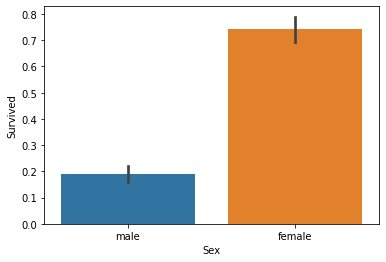

In [43]:
# Seaborn 시각화 패키지를 이용하여 그래프 그리기
sns.barplot(x='Sex', y = 'Survived', data=titanic_df)

<Axes: xlabel='Pclass', ylabel='Survived'>

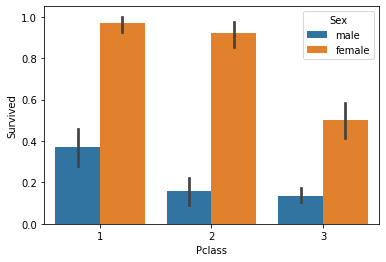

In [44]:
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=titanic_df)

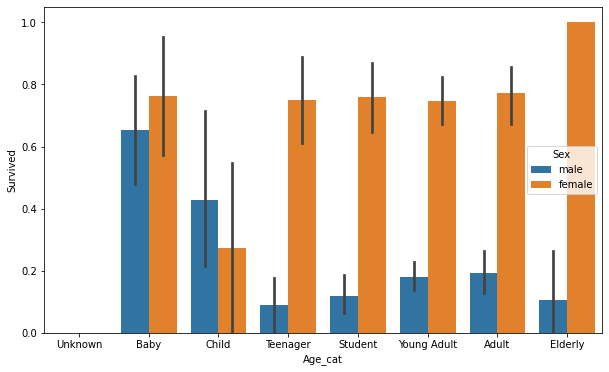

In [45]:
# 입력 age에 따라 구분값을 반환하는 함수 설정. DataFrame의 apply lambda식에 사용. 
def get_category(age):
    cat = ''
    if age <= -1: cat = 'Unknown'
    elif age <= 5: cat = 'Baby'
    elif age <= 12: cat = 'Child'
    elif age <= 18: cat = 'Teenager'
    elif age <= 25: cat = 'Student'
    elif age <= 35: cat = 'Young Adult'
    elif age <= 60: cat = 'Adult'
    else : cat = 'Elderly'
    
    return cat

# 막대그래프의 크기 figure를 더 크게 설정 
plt.figure(figsize=(10,6))

#X축의 값을 순차적으로 표시하기 위한 설정 
group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Elderly']

# lambda 식에 위에서 생성한 get_category( ) 함수를 반환값으로 지정. 
# get_category(X)는 입력값으로 'Age' 컬럼값을 받아서 해당하는 cat 반환
titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x : get_category(x))
sns.barplot(x='Age_cat', y = 'Survived', hue='Sex', data=titanic_df, order=group_names)
titanic_df.drop('Age_cat', axis=1, inplace=True)

In [46]:
# 데이터 전처리 실시
from sklearn import preprocessing

# 문자열을 숫자값으로 인코딩 변환
def encode_features(dataDF):
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(dataDF[feature])
        dataDF[feature] = le.transform(dataDF[feature])
        
    return dataDF

titanic_df = encode_features(titanic_df)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3


In [47]:
from sklearn.preprocessing import LabelEncoder

# Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    df['Fare'].fillna(0, inplace=True)
    return df

# 머신러닝 알고리즘에 불필요한 피처 제거
def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
    return df

# 레이블 인코딩 수행.
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# 앞에서 설정한 데이터 전처리 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [48]:
# 원본 데이터를 재로딩 하고, feature데이터 셋과 Label 데이터 셋 추출. 
titanic_df = pd.read_csv('/content/drive/My Drive/titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df= titanic_df.drop('Survived',axis=1)

X_titanic_df = transform_features(X_titanic_df)

In [49]:
# 학습 데이터와 테스트 데이터 세트 분리하기 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X_titanic_df, y_titanic_df, \
                                                  test_size=0.2, random_state=11)


In [50]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 결정트리, Random Forest, 로지스틱 회귀를 위한 사이킷런 Classifier 클래스 생성
dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression(solver='liblinear')

# DecisionTreeClassifier 학습/예측/평가
dt_clf.fit(X_train , y_train)
dt_pred = dt_clf.predict(X_test)
print('DecisionTreeClassifier 정확도: {0:.4f}'.format(accuracy_score(y_test, dt_pred)))

# RandomForestClassifier 학습/예측/평가
rf_clf.fit(X_train , y_train)
rf_pred = rf_clf.predict(X_test)
print('RandomForestClassifier 정확도:{0:.4f}'.format(accuracy_score(y_test, rf_pred)))

# LogisticRegression 학습/예측/평가
lr_clf.fit(X_train , y_train)
lr_pred = lr_clf.predict(X_test)
print('LogisticRegression 정확도: {0:.4f}'.format(accuracy_score(y_test, lr_pred)))


DecisionTreeClassifier 정확도: 0.7877
RandomForestClassifier 정확도:0.8547
LogisticRegression 정확도: 0.8659


In [51]:
from sklearn.model_selection import KFold

def exec_kfold(clf, folds=5):
    # 폴드 세트를 5개인 KFold객체를 생성, 폴드 수만큼 예측결과 저장을 위한  리스트 객체 생성.
    kfold = KFold(n_splits=folds)
    scores = []
    
    # KFold 교차 검증 수행. 
    for iter_count , (train_index, test_index) in enumerate(kfold.split(X_titanic_df)):
        # X_titanic_df 데이터에서 교차 검증별로 학습과 검증 데이터를 가리키는 index 생성
        X_train, X_test = X_titanic_df.values[train_index], X_titanic_df.values[test_index]
        y_train, y_test = y_titanic_df.values[train_index], y_titanic_df.values[test_index]
        
        # Classifier 학습, 예측, 정확도 계산 
        clf.fit(X_train, y_train) 
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        scores.append(accuracy)
        print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))     
    
    # 5개 fold에서의 평균 정확도 계산. 
    mean_score = np.mean(scores)
    print("평균 정확도: {0:.4f}".format(mean_score)) 
# exec_kfold 호출
exec_kfold(dt_clf , folds=5) 


교차 검증 0 정확도: 0.7542
교차 검증 1 정확도: 0.7809
교차 검증 2 정확도: 0.7865
교차 검증 3 정확도: 0.7697
교차 검증 4 정확도: 0.8202
평균 정확도: 0.7823


In [52]:
# GridSearchCV를 이용해 DecisionTreeClassifier의 최적 하이퍼 파라미터를 찾고 예측 성능 측정하기
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth':[2,3,5,10],
             'min_samples_split':[2,3,5], 'min_samples_leaf':[1,5,8]}

grid_dclf = GridSearchCV(dt_clf , param_grid=parameters , scoring='accuracy' , cv=5)
grid_dclf.fit(X_train , y_train)

print('GridSearchCV 최적 하이퍼 파라미터 :',grid_dclf.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dclf.best_score_))
best_dclf = grid_dclf.best_estimator_

# GridSearchCV의 최적 하이퍼 파라미터로 학습된 Estimator로 예측 및 평가 수행. 
dpredictions = best_dclf.predict(X_test)
accuracy = accuracy_score(y_test , dpredictions)
print('테스트 세트에서의 DecisionTreeClassifier 정확도 : {0:.4f}'.format(accuracy))


GridSearchCV 최적 하이퍼 파라미터 : {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 0.7992
테스트 세트에서의 DecisionTreeClassifier 정확도 : 0.8715


# 2.7 정리

##### 머신러닝 애플레케이션은 데이터의 가공 및 변환 과정의 전처리 작업, 데이터를 학습 데이터와 테스트 데이터로 분리하는 데이터 세트 분리 작업을 거친 후에 학습 데이터를 기반으로 머신러닝 알고리즘을 적용해 모델을 학습시킨다.
##### 학슴된 모델을 기반으로 테스트 데이터에 대한 예측을 수행한다
##### 예측된 결괏값을 실제 결괏값과 비교해 머신러닝 모델에 대한 평가를 수행하는 방식으로 구성된다
